This activity was one of the assessments for Machine Learning in Torrens university.

The purpose of this notebook is to predict the wine quality according physicochemical traits.

Three classification methods are used.:
-Decision tree.
-Random Forest.
-Support Vector Machine

Import libreries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import graphviz


Import the dataset using Github 

In [ ]:
url='https://raw.githubusercontent.com/anfelipe31/csv-files/master/winequality-white.csv'
data = pd.read_csv(url,sep=";")

In [ ]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# **DESCRIBE DATA**

Feature names

In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Value types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Data statistics information 

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Quality distribution

In [ ]:
data['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

# **DATA QUALITY**

Verify blanck spaces in dataset

In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# **DATA EXPLORATION**

Use pairplot to see relationship between pair of variables and distribution of single variables

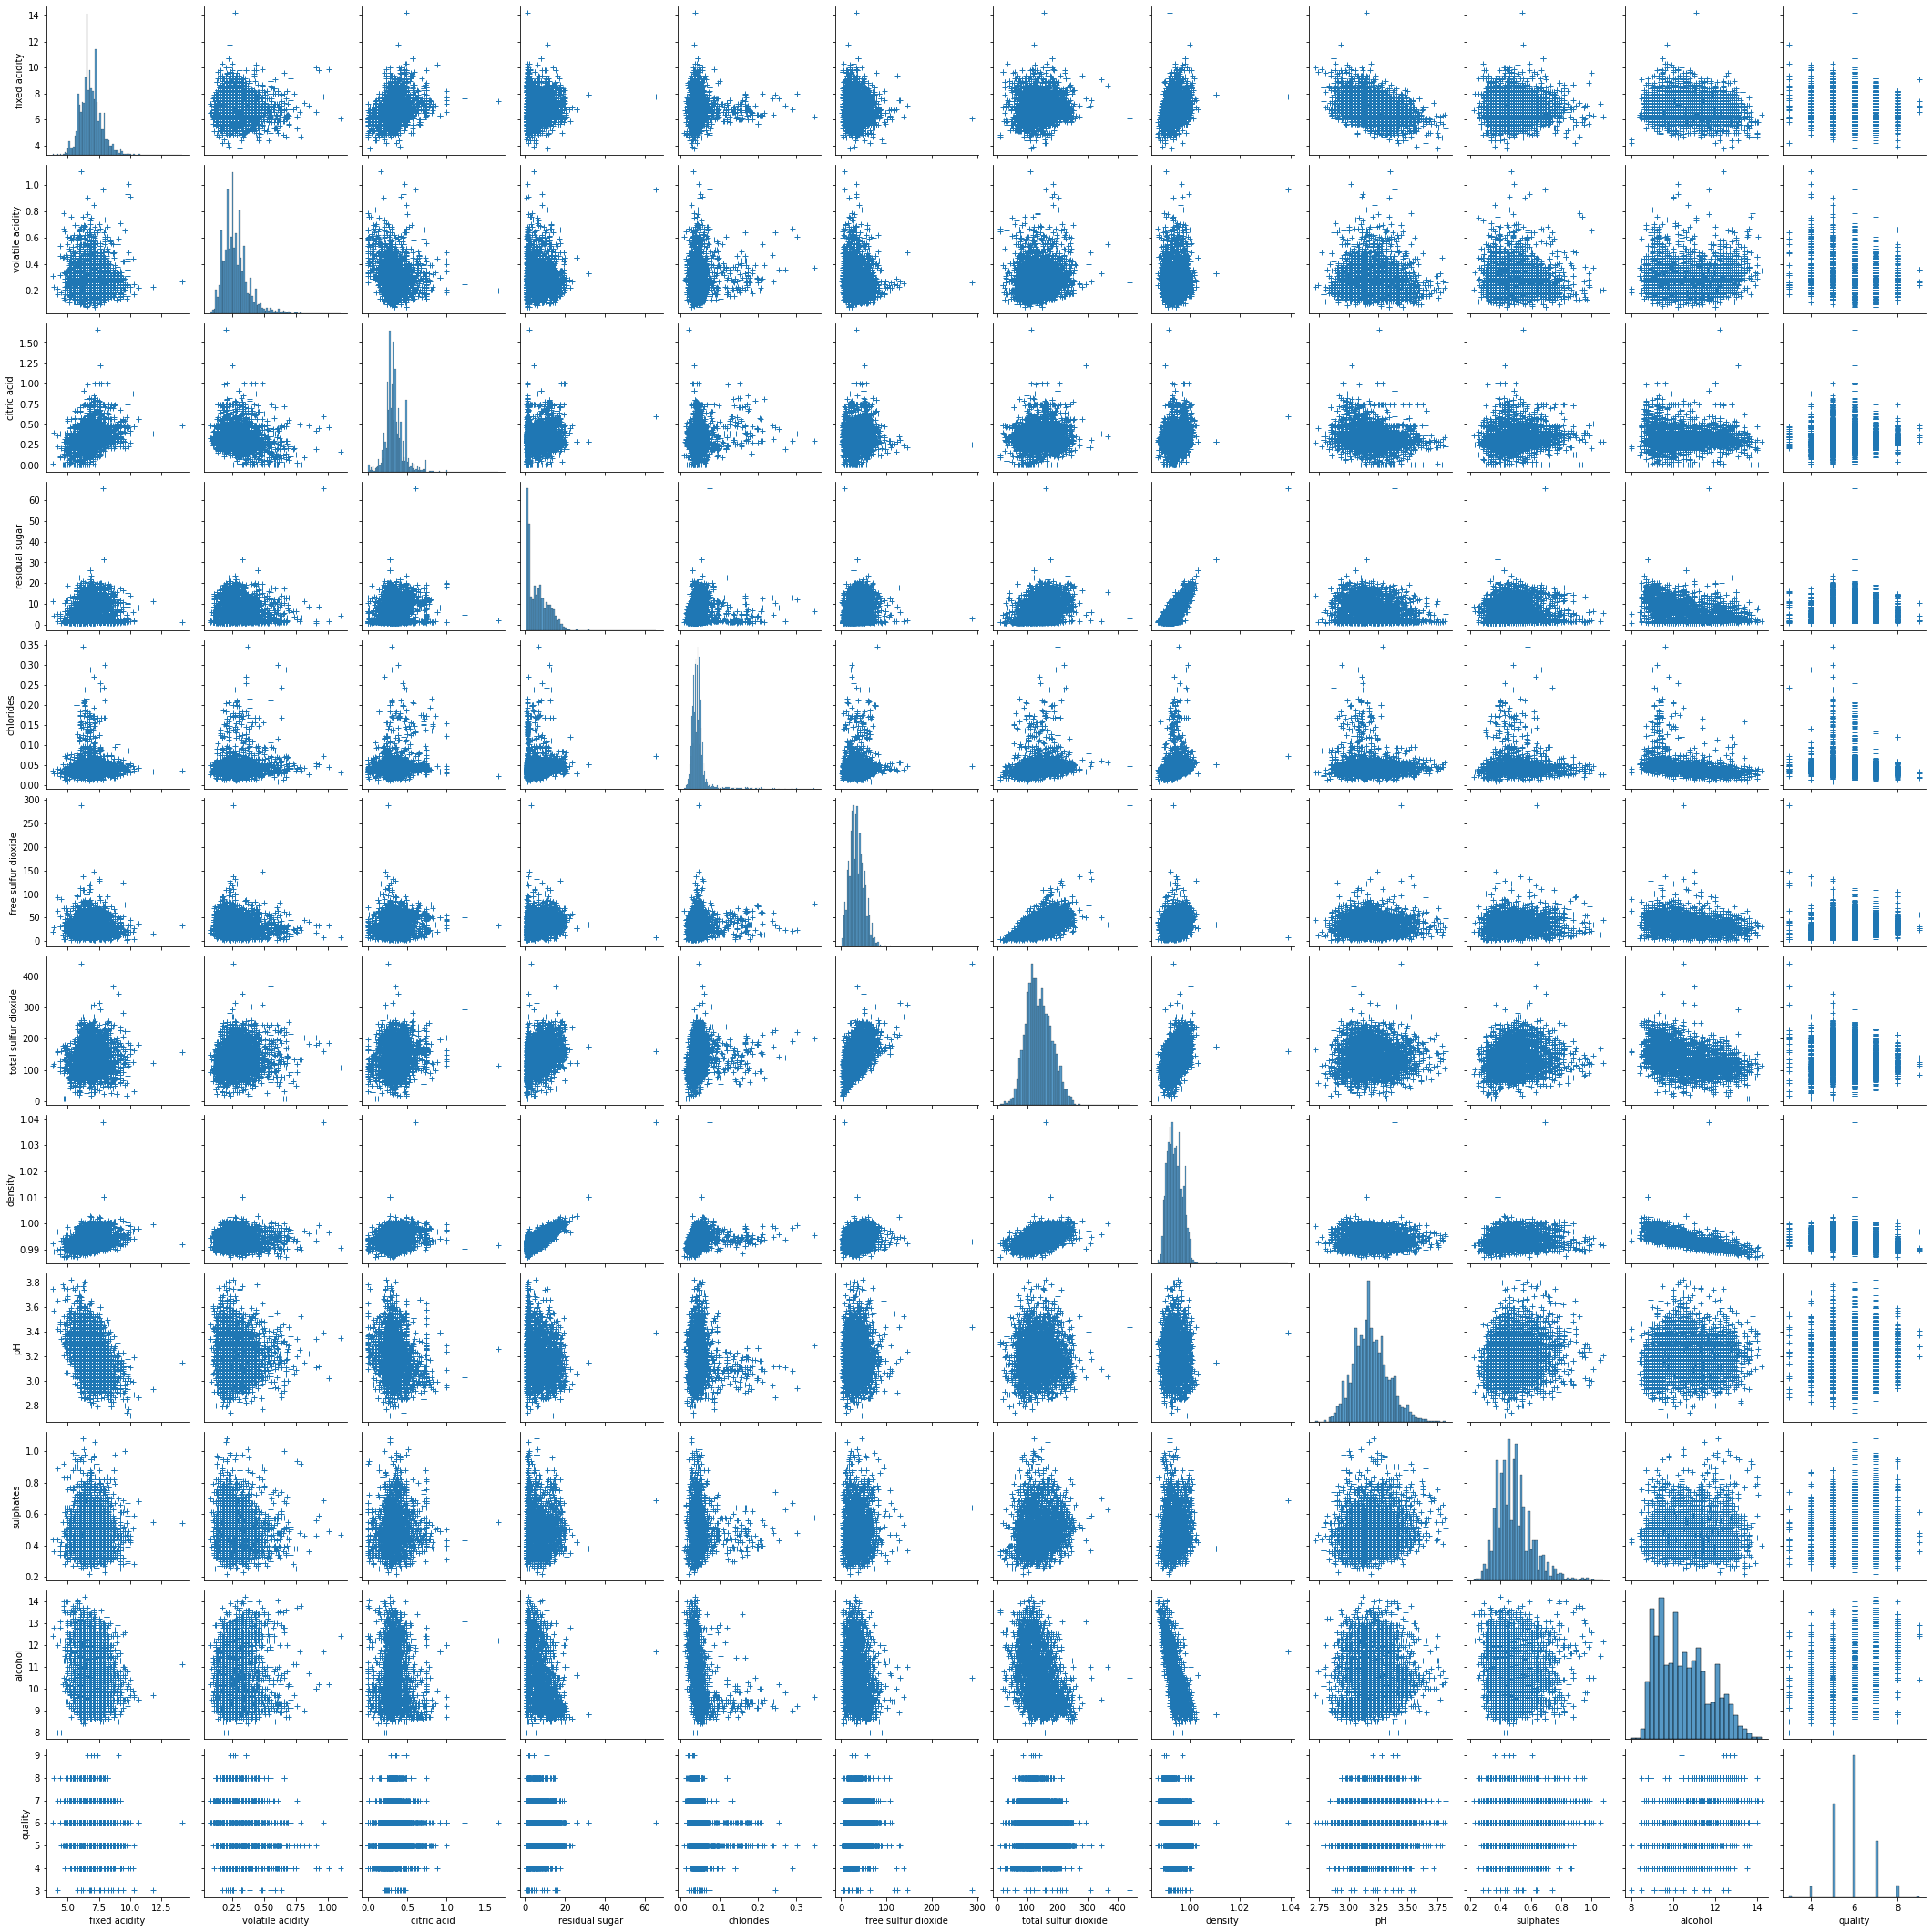

In [ ]:
sns.pairplot(data,plot_kws=dict(marker="+",linewidth=1))

Use heatmap to visualise correlation factors

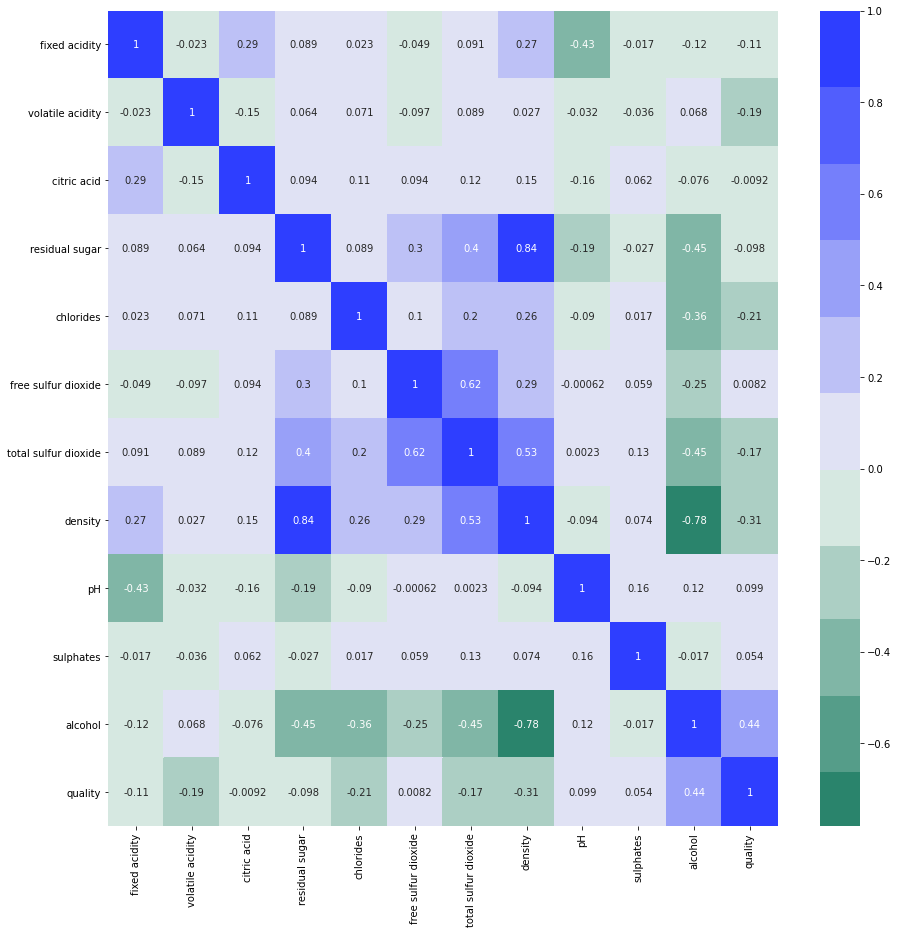

In [ ]:
corr=data.corr()
plt.figure(figsize=(15,15))
ax=sns.heatmap(corr,cmap=sns.diverging_palette(155,265,s=100,l=40,n=12),annot=True,center=0)

Use boxplot to visualize distribution of quantitave variables 

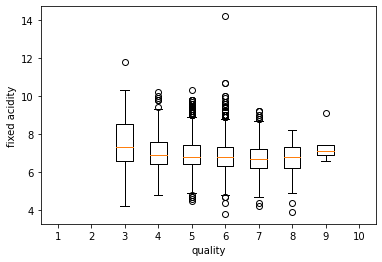

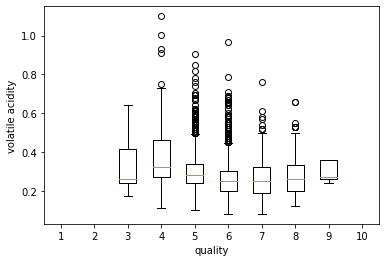

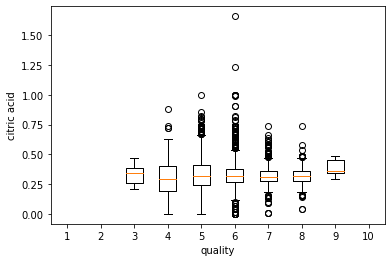

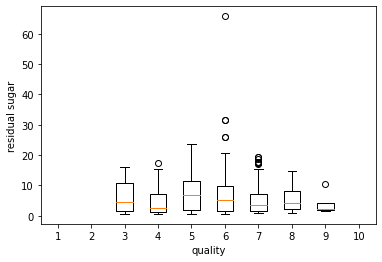

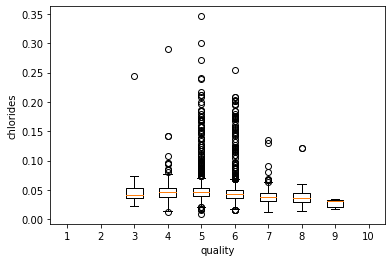

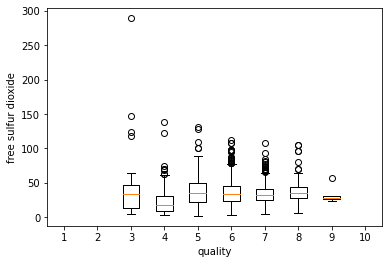

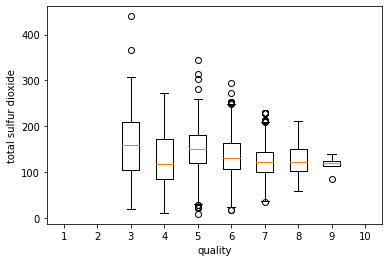

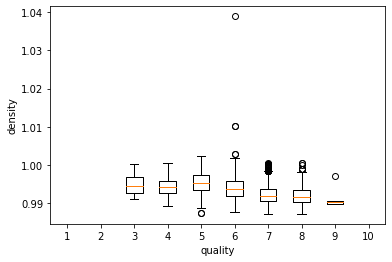

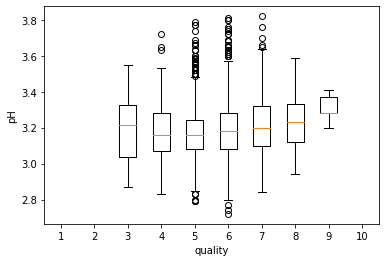

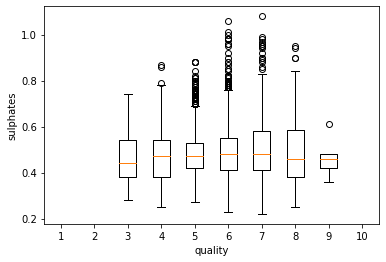

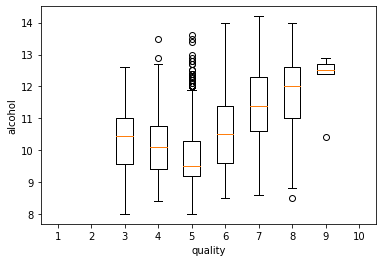

In [ ]:
for label in data.columns[:-1]:
  plt.boxplot ([data[data['quality']==i][label] for i in range (1,11)])
  plt.xlabel('quality')
  plt.ylabel(label)
  plt.show()

DATA PREPARATION

Mapping the quality column

convert the quality values to 0 for low quality wine and 1 for high quality wine. Drop the variables with low correlation coeficient

In [ ]:
data.loc[(data['quality']<6), 'quality2']=0  #Poor quality
data.loc[(data['quality']>=6), 'quality2']=1 # High quality
data.drop(['quality'], axis=1, inplace=True)
data.drop(['citric acid','free sulfur dioxide'], axis=1, inplace=True)
data['quality2'] = data['quality2'].astype(int)
data.drop(['quality'], axis=1, inplace=True)

In [ ]:
data

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality2
0,7.0,0.27,20.7,0.045,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.30,1.6,0.049,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.28,6.9,0.050,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.23,8.5,0.058,186.0,0.99560,3.19,0.40,9.9,1
4,7.2,0.23,8.5,0.058,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,1.6,0.039,92.0,0.99114,3.27,0.50,11.2,1
4894,6.6,0.32,8.0,0.047,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,1.2,0.041,111.0,0.99254,2.99,0.46,9.4,1
4896,5.5,0.29,1.1,0.022,110.0,0.98869,3.34,0.38,12.8,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   residual sugar        4898 non-null   float64
 3   chlorides             4898 non-null   float64
 4   total sulfur dioxide  4898 non-null   float64
 5   density               4898 non-null   float64
 6   pH                    4898 non-null   float64
 7   sulphates             4898 non-null   float64
 8   alcohol               4898 non-null   float64
 9   quality2              4898 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 382.8 KB


In [ ]:
data['quality2'].value_counts()

1    3258
0    1640
Name: quality2, dtype: int64

In [ ]:
data = data.reindex(np.random.permutation(data.index))
data.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality2
3204,6.8,0.28,7.5,0.035,177.0,0.99692,3.33,0.43,9.1,0
1554,7.9,0.42,8.2,0.056,164.0,0.99650,3.29,0.60,11.2,1
2679,7.6,0.18,7.1,0.041,110.0,0.99652,3.20,0.42,9.2,1
2291,8.6,0.17,2.7,0.047,150.0,0.99365,3.10,0.56,10.8,1
4275,5.7,0.22,16.0,0.044,113.0,0.99862,3.22,0.46,8.9,1


Split the data in training and testing

In [ ]:
x=data[['fixed acidity','volatile acidity','residual sugar','chlorides','total sulfur dioxide','density','pH','sulphates','alcohol']]
y=data['quality2']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# **Decision Tree**

Apply the decision tree to the datset. 1) Default values . 2) Tuned values

In [ ]:
tree_clf=DecisionTreeClassifier()
tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_pred=tree_clf.predict(x_test)
print(classification_report(y_test,tree_pred))
cross_val=cross_val_score(estimator=tree_clf, X=x_test, y=y_test, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.67      0.61      0.64       334
           1       0.81      0.85      0.83       646

    accuracy                           0.77       980
   macro avg       0.74      0.73      0.73       980
weighted avg       0.76      0.77      0.76       980

0.6938775510204083


tuned values

In [ ]:
tree_clf=DecisionTreeClassifier(min_weight_fraction_leaf=0.08)
tree_clf.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.08, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_pred=tree_clf.predict(x_test)
print(classification_report(y_test,tree_pred))
cross_val=cross_val_score(estimator=tree_clf, X=x_test, y=y_test, cv=10)
print(cross_val.mean())


              precision    recall  f1-score   support

           0       0.68      0.49      0.57       334
           1       0.77      0.88      0.82       646

    accuracy                           0.75       980
   macro avg       0.73      0.69      0.70       980
weighted avg       0.74      0.75      0.74       980

0.7428571428571429


Plot the tree

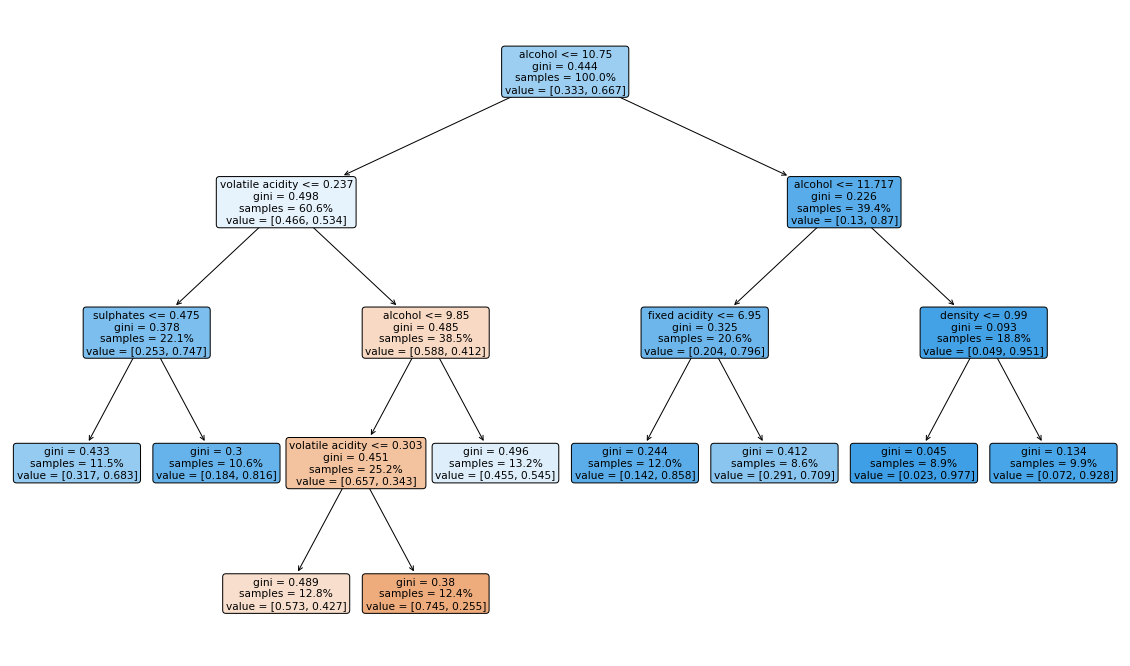

In [ ]:
plt.figure(figsize=(20,12))
a=plot_tree(tree_clf,
            feature_names=data.columns,
            filled=True,
            proportion=True,
            rounded=True)

Compare the decision tree model with VSM and Random Forest to see if results are reliable

# **SUPPORT VECTOR MACHINE**

In [ ]:
ksvm_clf=Pipeline([
                  ('scaler', StandardScaler()),
                  ('svm_clf', SVC(kernel='poly', degree=3,coef0=1,C=3))
])
ksvm_clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=3, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
svm_pred=ksvm_clf.predict(x_test)
print(classification_report(y_test,svm_pred))
cross_val=cross_val_score(estimator=tree_clf, X=x_test, y=y_test, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.70      0.55      0.62       334
           1       0.79      0.87      0.83       646

    accuracy                           0.77       980
   macro avg       0.74      0.71      0.72       980
weighted avg       0.76      0.77      0.76       980

0.7428571428571429


# **RANDOM FOREST**

In [ ]:
randf_clf=RandomForestClassifier()
randf_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rand_pred=randf_clf.predict(x_test)
print(classification_report(y_test,rand_pred))
cross_val=cross_val_score(estimator=randf_clf, X=x_test, y=y_test, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.81      0.66      0.73       334
           1       0.84      0.92      0.88       646

    accuracy                           0.83       980
   macro avg       0.82      0.79      0.80       980
weighted avg       0.83      0.83      0.83       980

0.7693877551020408
